# <font color='blue'> A Case Study on Lending Club


- Lending Club LendingClub is a peer-to-peer lending company headquartered in San Francisco, California and it provides loans to borrowers, but a lot of borrowers default, that is they do not return the borrowed amount along with accumulated interest back to the lenders.
- Such defaults results in financial loss to the businesses or lenders.
- The purpose of this case study is to identify some of the prominent factors which can help understanding borrowers who have higher probability of defaulting.
- In this project, many of the factors have been analyzed and identified from the data and have been reported.

 ## Importing Libraries required


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Importing data

In [4]:
df_loan = pd.read_csv("loan.csv")
df_colums = pd.read_excel("Data_Dictionary.xlsx")

In [5]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,891438,1108225,15000,15000,15000.0,60 months,11.71%,331.48,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6850,890158,1106736,6000,6000,6000.0,60 months,9.91%,127.22,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6851,853229,1065387,12000,12000,12000.0,36 months,6.03%,365.23,A,A1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6852,891428,1108211,10625,10625,10600.0,36 months,6.62%,326.23,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df_colums #all column definitions 

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


##Cleaning the data

###Checking whether all columns are present in both loan and loan column definition dataset

In [7]:
#remove any nulls collums in the data

df_colums=df_colums.dropna(1,"all")


In [8]:
#difference of columns in given data and column of defined data

set(df_loan.columns) - set(df_colums["LoanStatNew"])

{'total_rev_hi_lim', 'verification_status_joint'}

###Tha above columns are not present in the data definition so we can drop them

In [9]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)

###Dropping all the columns where all the values in it are null

In [10]:
df_loan=df_loan.dropna(1,how="all")

###Shape of the data after dropping the columns

In [11]:
df_loan.shape

(6854, 57)

###Checking total number of nulls present in each column

In [12]:
df_loan.isna().sum()[df_loan.isna().sum() > 0]


emp_title                      454
emp_length                     243
desc                          3076
mths_since_last_delinq        4694
mths_since_last_record        6587
revol_util                       3
total_rec_int                    1
total_rec_late_fee               1
recoveries                       1
collection_recovery_fee          1
last_pymnt_d                    11
last_pymnt_amnt                  1
next_pymnt_d                  6290
last_credit_pull_d               1
collections_12_mths_ex_med       1
policy_code                      1
application_type                 1
acc_now_delinq                   1
chargeoff_within_12_mths         1
delinq_amnt                      1
pub_rec_bankruptcies             1
tax_liens                        1
dtype: int64

###Removing outliers (removing columns having high null values)

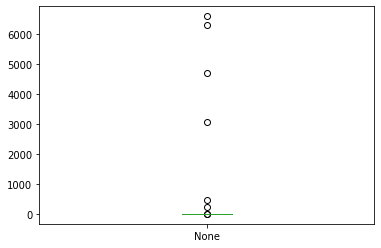

In [13]:
#by this we get to know how many columns are very high null values

df_loan.isna().sum().plot.box()

###Follwing columns are having high null values -> 'desc' 'mths_since_last_record' 'next_pymnt_d' 'mths_since_last_delinq'

In [14]:
# droping all outliers in box plot

df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],1)

###Dropping rows having high null values in the columns i.e 'pub_rec_bankruptcies' 'emp_title' 'emp_length'

In [15]:
# removing null values 

df_loan = df_loan[~df_loan["emp_length"].isna()]


In [16]:
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]

In [17]:
df_loan=df_loan[~df_loan.emp_title.isna()]

###Left over null values

In [18]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 


revol_util       2
last_pymnt_d    10
dtype: int64

In [19]:
df_loan = df_loan[~df_loan["revol_util"].isna()]
df_loan = df_loan[~df_loan["last_pymnt_d"].isna()]
df_loan = df_loan[~df_loan["collections_12_mths_ex_med"].isna()]
df_loan = df_loan[~df_loan["chargeoff_within_12_mths"].isna()]


###Removal of all Null Values

In [20]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 


Series([], dtype: int64)

In [21]:
df_loan.shape

(6374, 53)

###List of Columns left for analysis

In [22]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#Data Analysis

##Univariate Analysis

###Id :A unique ID for the loan listing.
###member_id : A unique company assigned Id for the borrower member

We conert it into String Datatype so it becomes Easy for Manipulation

In [23]:
df_loan["id"]= df_loan["id"].astype('string')

df_loan["member_id"] = df_loan["member_id"].astype('string')

###loan_amnt : The listed amount of the loan applied for by the borrower

In [24]:
df_loan["loan_amnt"].describe()

count     6374.000000
mean     13064.582680
std       8366.756743
min       1000.000000
25%       6400.000000
50%      12000.000000
75%      17575.000000
max      35000.000000
Name: loan_amnt, dtype: float64

###Plotting the Graph

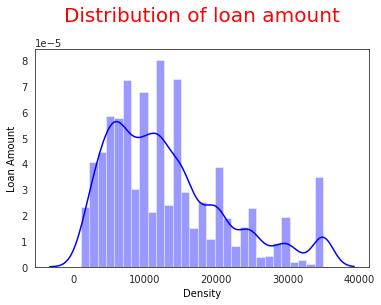

In [25]:
#ploting the graph 

sns.set_style("white")
sns.distplot(df_loan.loan_amnt, color="b")

# Labeling the Axes

plt.xlabel("Density", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Loan Amount", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})

# Adding and formatting title

plt.title("Distribution of loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

plt.show()

##Insights

1.Loan applied lies between 500 to 35000

2.By this graph we got to understand that most of the loan borrowers need money under 15000



funded_amnt : The total amount committed to that loan at that point in time

funded_amnt lies in between 500 to 35000 as observed from the graph

In [26]:
df_loan["funded_amnt"].describe()

count     6374.000000
mean     12971.819109
std       8266.898919
min       1000.000000
25%       6400.000000
50%      12000.000000
75%      17237.500000
max      35000.000000
Name: funded_amnt, dtype: float64

###Derived Metrics:
 New column added "loan_approval" = percent of money funded to them of what they asked

In [27]:
df_loan["loan_approval"] = df_loan["funded_amnt"]/df_loan["loan_amnt"]*100

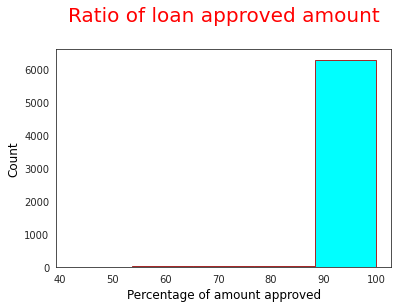

In [28]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center

plt.hist(df_loan["loan_approval"], bins=5, align='mid', edgecolor='Brown',color='cyan')

# Adding and formatting title

plt.title("Ratio of loan approved amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

# Labeling Axes

plt.xlabel("Percentage of amount approved", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

##Insights

From the Grapgh we can see that the majority of the people who applid  were funded

funded_amnt_inv : The total amount committed by investors for that loan at that point in time

In [29]:
df_loan["funded_amnt_inv"].describe()

count     6374.000000
mean     12922.811155
std       8231.482685
min        750.000000
25%       6400.000000
50%      11762.500000
75%      17200.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [30]:
zero_inv=df_loan[df_loan["funded_amnt_inv"] == 0] 
# there are 129 row with 0

IndexError: ignored

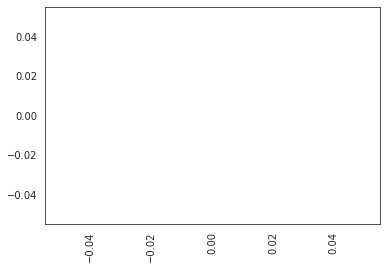

In [31]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
zero_inv.loan_status.value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("People who were not accepted to fund by invester\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

###Insights

funded_amnt_inv lies between 0 to 35000 but there are 129 records with 0 this might be because investor did want to invest
In the 129 records majority of the people paid off the loan so it is better to provide them loans and reduce the business loss

term : The number of payments on the loan. Values are in months and can be either 36 or 60

In [ ]:
df_loan["term"].value_counts()

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["term"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding how people took the terms\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

##Insights

There are two values 36 and 60 months
By this we get to understand that majority of the people have took the 36 months tenure period

int_rate : Interest Rate on the loan

In [ ]:
df_loan["int_rate"].value_counts() 


we have to fix the data type string -> float

In [ ]:
def remove_last_char_tofloat(x): # creating a generic function which will remove '%' and convert into flaot
    x = x[:-1]
    return float(x) 

In [ ]:
#applying the function to columns
df_loan["int_rate"]=df_loan["int_rate"].apply(remove_last_char_tofloat)

In [ ]:
df_loan["int_rate"].dtype

In [ ]:
df_loan["int_rate"].describe()

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["int_rate"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Intrest", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***

Given data in string - Need to fix the data type to float
int_rate lies between 5% to 24%
High interest implies high risk and vice versa
From the graph we can say majority of the people are lying in between 10 to 15 percent interest rate

installment : The monthly payment owed by the borrower if the loan originates.

In [ ]:
df_loan["installment"].describe()


In [ ]:
df_loan= df_loan[df_loan["installment"] < 700] ## removing the ouliers 

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["installment"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Monthly Installment Money\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Installment Money(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***

Installment lies between 15 to 1305 where 75 percentile data lies under 430
This implies that there are some outliers who are paying high amount in one installment
IQR(Inter quartile range) is 263
Majority of the people have monthly installment between 160 and 430


grade : LC assigned loan grade

In [ ]:
df_loan["grade"].value_counts()

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["grade"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Number of Grades In the Data \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***

B grade loans are nearly 12020 which is the highest number of loan given

sub_grade : LC assigned loan subgrade

In [ ]:
df_loan["sub_grade"].value_counts()


***Insights***

Each grade is again divided into 5 subgrades like A1,A2,A3,A4,A5


emp_title : The job title of the person applying for the loan.

In [ ]:
df_loan["emp_title"].value_counts()
df_loan["emp_title"].isna().sum()
df_loan["emp_title"].value_counts().describe()

***Insights***

Majority of the people are from different companies and 75 percentile of data are unique, so we cannot find much insights from this data

emp_length : Employment length in years.

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Employment length Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [ ]:
def clean_emp_year(x):
    x =  x.replace("years" , "")
    x =  x.replace("year" , "")
    x = x.replace("< 1" , "0")
    x = x.replace("+" , "")
    return int(x) 

In [ ]:
df_loan["emp_length"] = df_loan["emp_length"].apply(clean_emp_year)#cleaning the data 

***Insights***

Possible values are between 0 and 10 where 0 denotes less than one year and 10 denotes ten or more years.
1075 null values are present
From the graph we can see that people having 10+ year experience are majority of applicants of the loan

home_ownership : The home ownership status provided by the borrower during registration.



In [ ]:
df_loan = df_loan[~(df_loan["home_ownership"] == "NONE")]# droping the rows with none

In [ ]:
df_loan = df_loan[~(df_loan["home_ownership"] == "OTHER")]# droping the rows with Other value

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["home_ownership"].value_counts().apply(lambda x : x /df_loan["home_ownership"].shape[0]*100).plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Home Ownership Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***

Majority of the people who applied for the loan are living on rent or mortgage
This implies that 80% are not having full home ownership

annual_inc : The self-reported annual income provided by the borrower during registration.

Maximum is very high and there are two oultlier (tis will miss-lead us)
So we can drop these records highter than > 30 lakhs

In [ ]:
df_loan["annual_inc"].max()

In [ ]:
df_loan["annual_inc"].min()

In [ ]:
df_loan["annual_inc"].plot.box()

In [ ]:
df_loan.shape # before droping the values

In [ ]:
np.percentile(df_loan["annual_inc"],90)

In [ ]:
df_loan = df_loan[df_loan["annual_inc"] < 116000.0] # after droping the values 

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["annual_inc"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Income(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***

Majority of the people's annual income is lies between 40000 to 80000

verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x).value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Verified Status of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

***Insights***

Majority of the data for income is verified(65%)
But nearly 35% data about income is not verfied
Changed the values of source verified to verified (because end of the day they are atleast verified)

issue_d : The month which the loan was funded

In [ ]:
df_loan["issue_d"].value_counts()

In [ ]:
df_loan["issue_d_month"]=df_loan["issue_d"].apply(lambda x : x[:3])

In [ ]:
df_loan["issue_d_year"] = df_loan["issue_d"].apply(lambda x : x[4:])

In [ ]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_month"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken Monthly \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [ ]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_year"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken by Year \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***:

All months are mentioned
Splitting the months and years to two different column helps to find more insights
Majority of the people have taken loan in the end of the year
Need to promote other months also to increase profits
Majority of the people have taken loan in 2011 and after every year, the number of loan borrowers have increased

loan_status : Current status of the loan

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["loan_status"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [ ]:
f_loan=df_loan[df_loan["loan_status"] != "Current"] 
#removing the current values rows because they can pay full ammount so we can't find much Insigths

***Insights***: important column

There are three category of loan status
Fully Paid,Charged Off ,Current
We are removing current column because we cannot get much insight with these data

***Insights***: important column

There are three category of loan status
Fully Paid,Charged Off ,Current
We are removing current column because we cannot get much insight with these data

In [ ]:
df_loan["pymnt_plan"].value_counts()

In [ ]:
df_loan = df_loan.drop("pymnt_plan" ,1)
df_loan.shape

url : URL for the LC page with listing data.

this column is not use full for getting insights to reduces the risk

In [ ]:
df_loan["url"][1]

In [ ]:
df_loan = df_loan.drop("url",1)

In [ ]:
df_loan.shape

purpose : A category provided by the borrower for the loan request.

different categorys like wedding,car etc
14 distict categorys

In [ ]:
df_loan["purpose"].value_counts()

In [ ]:
df_loan = df_loan[~(df_loan["purpose"] == "renewable_energy")] # removing minimum number of columns

title :The loan title provided by the borrower

Purpose he is taking the loan
Already we have category of the loan and majority of the data that is 75% percentile data is unique values
So we can drop this columns

In [ ]:
df_loan["title"].value_counts().describe()

In [ ]:
df_loan = df_loan.drop("title",1)

zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.

In [ ]:
df_loan["zip_code"].value_counts()

***Insights***

Highest loans are taken from zip_code with 112XX
Half of the zip_codes were unique zip_codes

addr_state : The state provided by the borrower in the loan application

In [ ]:
df_loan["addr_state"].value_counts().describe()

In [ ]:
df_loan["addr_state"].value_counts().describe()

In [ ]:
plt.figure(figsize = (16,6))

# plotting bar chart and setting bar aligning it to center
df_loan["addr_state"].value_counts()[df_loan["addr_state"].value_counts() > 117].plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Undestarding Distribution of loan taken by States\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***Insights***:

California state has highest number of loan count
Need to promote loans in other states as well to increase profit
We have some states with only 3 loans also we can avoid that states

dti :A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [ ]:
df_loan["dti"].describe()

In [ ]:
# plotting bar chart and setting bar aligning it to center
df_loan["dti"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of DTI Ratio\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})


plt.show()

***Insights***:

Here dti ratio lies between 0 to 29.0
Where as maximum dti ratio lies between 10 to 20

delinq_2yrs : The number of 30+ days past-due incidences of delinquency(neglect of one's duty) in the borrower's credit file for the past 2 years



In [ ]:
df_loan["delinq_2yrs"].describe()

In [ ]:
df_loan["delinq_2yrs"].value_counts()

Insights

here maximum are 0 (approximatly 31,967 are 0)
so we remove these columns

earliest_cr_line : The month the borrower's earliest reported credit line was opened

In [ ]:
df_loan["earliest_cr_line"].value_counts()

In [ ]:
df_loan["earliest_cr_line_year"]=df_loan["earliest_cr_line"].apply(lambda x : x[-2:])

In [ ]:
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].apply(lambda x : x[:3])

In [ ]:
df_loan["earliest_cr_line"].value_counts().plot.bar()

***Insights***

given with year so we need to split months with year
oct month maximum people opened credit line
year end is were maximum times people opened credit line


inq_last_6mths': The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [ ]:
df_loan["inq_last_6mths"].value_counts().plot.bar()

Datatype is int
No:of null value - 0
From the graph we get to understand majority of the people have no inquiries

'open_acc'

The number of open credit lines in the borrower's credit file.*
Datatype is int
No:of null value - 0

In [ ]:
df_loan["open_acc"].describe()


 'total_acc'

The total number of credit lines currently in the borrower's credit file
Datatype is object
No:of null value - 0

In [ ]:
df_loan["total_acc"].value_counts()

'initial_list_status'

The initial listing status of the loan. Possible values are – W, F
Datatype is int
No:of null value - 0
This is not helpful

In [ ]:
df_loan["initial_list_status"].value_counts()

In [ ]:
df_loan=df_loan.drop("initial_list_status",1)

In [ ]:
df_loan.shape #current shape ofter droping the columns

out_prncp'

Remaining outstanding principal for total amount funded
Datatype is float
No:of null value - 0

In [ ]:
df_loan["out_prncp"].value_counts()

Column 32 is 'out_prncp_inv'

Remaining outstanding principal for portion of total amount funded by investors
Datatype is float
No:of null value - 0
Similar to column 31, so can remove

In [ ]:
df_loan=df_loan.drop("out_prncp_inv",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns

'total_pymnt'

Payments received to date for total amount funded
Datatype is int
No:of null value - 0
need to check outlier

In [ ]:
df_loan["out_prncp"].value_counts()

'total_pymnt_inv'

Payments received to date for portion of total amount funded by investors
Datatype is int
No:of null value - 0
need to remove - same as column 33

In [ ]:
df_loan=df_loan.drop("total_pymnt_inv",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns


'total_rec_prncp'

Principal received to date
Datatype is float
No:of null value - 0
need to remove - similar to column 33 and 34


In [ ]:
df_loan=df_loan.drop("total_rec_prncp",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns

total_rec_int'

Interest received to date
Datatype is float
No:of null value - 0

In [ ]:
df_loan["total_rec_int"].value_counts()

'total_rec_late_fee'

Late fees received to date
Datatype is int
No:of null value - 0

In [ ]:
df_loan["total_rec_late_fee"].value_counts()

'recoveries'

post charge off gross recovery
Datatype is int
No:of null value - 0

In [ ]:
df_loan[df_loan["recoveries"] > 0]["recoveries"].describe()

collection_recovery_fee'

post charge off collection fee
Datatype is int
No:of null value - 0
some relation with column 39

In [ ]:
df_loan["collection_recovery_fee"].value_counts()


 'last_pymnt_d'

Last month payment was received
Datatype is object
No:of null value - 71
Can analyse to find insight about when the last payment was

In [ ]:
df_loan["last_pymnt_d"].value_counts()

In [ ]:
df_loan["last_pymnt_d_year"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[-2:])

In [ ]:
df_loan["last_pymnt_d"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[:3])

In [ ]:
df_loan["last_pymnt_d"].value_counts().plot.bar()

***Insights***

may is highest people payed there last month payment

last_pymnt_amnt'

Last total payment amount received
Datatype is int
No:of null value - 0

In [ ]:
df_loan["last_pymnt_amnt"].describe()

'last_credit_pull_d'

The most recent month LC pulled credit for this loan
Datatype is object
No:of null value - 2

'collections_12_mths_ex_med'

Number of collections in 12 months excluding medical collections
Datatype is int
No:of null value - 50
Can be removed - 0 value in every column

In [ ]:
df_loan=df_loan.drop("collections_12_mths_ex_med",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns


'policy_code'

publicly available policy_code=1, new products not publicly available policy_code=2
Datatype is int
No:of null value - 0
Can be removed

In [ ]:
df_loan=df_loan.drop("policy_code",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns

'application_type'

Indicates whether the loan is an individual application or a joint application with two co-borrowers
Datatype is object
No:of null value - 0
Can be removed - just 1 value

In [ ]:
df_loan=df_loan.drop("application_type",1)

In [ ]:
df_loan.shape # current shape ofter droping the columns


'acc_now_delinq'

The number of accounts on which the borrower is now delinquent.
Datatype is int
No:of null value - 0
Can be removed - just one value -that is 0

In [ ]:
df_loan=df_loan.drop("acc_now_delinq",1)


'chargeoff_within_12_mths'

Number of charge-offs within 12 months
Datatype is float
No:of null value - 0
Can be removed - just one value -that is 0

In [ ]:
df_loan=df_loan.drop('chargeoff_within_12_mths',1)

 'delinq_amnt'

The past-due amount owed for the accounts on which the borrower is now delinquent.
Datatype is float
No:of null value - 0
Can be removed - just one value -that is 0

In [ ]:
df_loan=df_loan.drop('delinq_amnt',1)


'pub_rec_bankruptcies'

Number of public record bankruptcies
Datatype is float
No:of null value - 697
Useful column

 'tax_liens'

Number of tax liens
Datatype is float
No:of null value - 39
Can be removed - just one value -that is 0

In [ ]:
df_loan=df_loan.drop('tax_liens',1)


In [ ]:
df_loan.shape # current shape ofter droping the columns


In [ ]:
Customer_behaviour_data = ['delinq_2yrs', "earliest_cr_line" ,'earliest_cr_line_year' , "inq_last_6mths" , "open_acc"  , "pub_rec" , "revol_bal" , 
                            "revol_util", "total_acc","out_prncp","total_pymnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                                "last_pymnt_d",'last_pymnt_d_year',"last_pymnt_amnt","last_credit_pull_d"] 

we have analysed the whole data and found some columns are customer behaviour data which is collected before giving loan by here we assume that they have already got the loan so we can drop all these columns**

In [ ]:
df_loan=df_loan.drop(Customer_behaviour_data,1)


In [ ]:
df_loan.shape


In [ ]:
df_loan.columns



summary
Understood the data clearly
we done the cleaning were ever required
done the univariant analysis if required for that column
we derived some important insights
derived some columns where ever reqired to get more informations like loan approved ratio etc
we left with 25 columns
we have figured out what all columns are customer behaviour columns

In [ ]:
df_loan.columns #left columns which we can do bivarient analysis



In [ ]:
df_loan["loan_status"]

Bivariant Analysis


Relating Between Loan Status and Loan Amount

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Loan Amount(US)", fontsize=12)
plt.title("Loan Amount and Loan Status", fontsize=20)

plt.show()

***Insights***:

By observing the median and 3rd quartile people who have taken higher loan amount are likely to charge off

Relating Between Loan Status and Loan Term

In [ ]:
term_loanstatus = pd.crosstab(index=df_loan['term'], columns=df_loan['loan_status'], normalize=0).reset_index()
term_loanstatus

In [ ]:
#create stacked bar chart
term_loanstatus.set_index('term').plot(kind='bar', stacked=True, color=['coral','aqua'] ,figsize=(7,7))

for idx, row in term_loanstatus.iterrows():
    plt.text(idx-.05, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))

plt.xticks(rotation=0)

plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Checking Loan status by terms", fontsize=20)

plt.show()

***Insights***:

The percentage of defaulters are higher in 60 months term with about 25% charge-off whereas it is just 11% for 36 month term
So, there is a possibility that longer term loans are more risky and prone to higher default

Relating Between Loan Status and Interest Rate

In [ ]:
df_loan_intrest =df_loan.groupby('loan_status').agg({'int_rate': 'median'})

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.title("Interest Rate and Loan Status", fontsize=20)


plt.show()

***Insights***:

The interest rate in charged off were higher than that of fully paid which may be infer that higher interest rate could result in higher charge offs

Relating Between Loan Status and Home Ownership

In [ ]:
plt.figure(figsize = (7,7))


sns.countplot(x="home_ownership" ,data=df_loan, hue="loan_status" , palette="hls")
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Home Ownership and loan status", fontsize=20)


plt.show()

***Insights***:

people who have stay in rent and are in mortagage are likely to be charged off (we need to be careful while giving the loan)
people who have own house are less likely to be charged off compared to people who stay in rent and mortage

Relating Between Loan Status and monthly Installment Amount

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Installment amount(US)", fontsize=12)
plt.title("Installment and loan status", fontsize=20)


plt.show()

***Insights*** :

By observing median and 3rd quartile charged off are higher than fully paid
People with high installment amount are likely to be charged off

Relating Between Loan Status and grade of loan

In [ ]:
grade_loanstatus = pd.crosstab(index=df_loan['grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
grade_loanstatus

In [ ]:
#create stacked bar chart
grade_loanstatus.set_index('grade').plot(kind='bar', stacked=True, color=['coral','aqua'],figsize=(7,7))

for idx, row in grade_loanstatus.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plt.xlabel("Grades", fontsize=12)
plt.title("Grades and Loan Status", fontsize=20)
plt.show()

***Insights***:

Lower grade loans results in higher charge offs.
We can see as grades gets lower, charge off rate increases proportionately

Relating Between Loan Status and subgrade of loan

In [ ]:
subgrade_loanstatus = pd.crosstab(index=df_loan['sub_grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
subgrade_loanstatus.head()

In [ ]:
#create stacked bar chart

axes = subgrade_loanstatus.set_index('sub_grade').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for i, row in subgrade_loanstatus.iterrows():
    plt.text(i-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 8))
plt.xlabel("Sub-Grades", fontsize=12)
plt.title("Sub-Grades and Loan Status", fontsize=20)
plt.show()

***Insights***:

We can see as sub-grades gets lower, charge off rate increases proportionately
A1 grade is one of the best grade to give the loan

Relating Between Loan Status and Employment Experience

In [ ]:
def bucket(x): # creating buckets for getting more insights
    if(x==0):
        return "Fresher"
    elif(x>=1 and x<3):
        return "1-3"
    elif(x>=3 and x<5):
        return "3-5"
    elif(x>=5 and x<7):
        return "5-7"
    elif(x>=7 and x<10):
        return "7-10"
    elif(x>=10):
        return "10+"
        

In [ ]:
df_loan["emp_length_buckets"]=df_loan.emp_length.apply(bucket)

In [ ]:
crosstab_emplen_status = pd.crosstab(index=df_loan['emp_length_buckets'], columns=df_loan['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = crosstab_emplen_status.set_index('emp_length_buckets').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_emplen_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(in years)", fontsize=12)
plt.title("Employment Length and Loan Status", fontsize=20)
plt.show()

***Insights***:

there is not much difference in years of experience
but there is slight people with higher expererience are likely to charged off (above 10years )

Relating Between Loan Status and Annual Income

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Annual Amount(US)", fontsize=12)
plt.title("Annual Income and loan status", fontsize=20)


plt.show()

***Insights***:

The median annual income is less for charged off persons
People having less income are more likely to default.

Relating Between Loan Status and Purpose

In [ ]:
crosstab_purpose_status = pd.crosstab(index=df_loan['purpose'], columns=df_loan['loan_status'], normalize=0).reset_index()
crosstab_purpose_status

In [ ]:
#create stacked bar chart

axes = crosstab_purpose_status.set_index('purpose').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_purpose_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Purpose", fontsize=12)
plt.title("Purpose and Loan Status", fontsize=20)
plt.show()

***Insights***:

Small business are more likely to charge off compared to other purpose as they are the 28% of people who charged off

Relating Between Loan Status and DTI Ratio

In [ ]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("DTI Ratio", fontsize=12)
plt.title("DTI and loan status", fontsize=20)


plt.show()

***Insights***:

Higher the dti are more likely to charged off

Relating public bankruptcies with loan status

In [ ]:
bankrupt_loanstatus = pd.crosstab(index=df_loan['pub_rec_bankruptcies'], columns=df_loan['loan_status'], normalize=0).reset_index()
bankrupt_loanstatus

In [ ]:
#creating stacked bar chart

axes = bankrupt_loanstatus.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True, color=['coral','aqua'])

# figure object extraction
fig = axes.get_figure()

for i, row in bankrupt_loanstatus.iterrows():
    plt.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plt.xlabel('No: of Public Bankruptcies')
plt.ylabel('Proportion of Loans')

fig.set_size_inches((8, 6))
plt.title("public bankruptcies with loan status", fontsize=20)
plt.show()

***Insights***

As number of bankruptcies increases the charge off rate also increases